箱线图一般用来展现数据的分布（如上下四分位值、中位数等），同时，也可以用箱线图来反映数据的异常情况。

boxplot函数的参数解读

绘图之前，我们先来讲解一下matplotlib包中boxplot函数的参数含义及使用方法：

# 箱线图的绘制

案例：

titanic： 整体乘客的年龄箱线图

c:\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


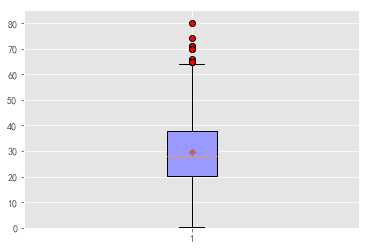

In [1]:
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 读取Titanic数据集
f = open('16-06titanic_train.csv')
titanic = pd.read_csv(f)

# 不妨删除含有缺失年龄的观察
titanic.dropna(subset=['Age'], inplace=True)

# 设置图形的显示风格
plt.style.use('ggplot')

# 设置中文和负号正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 绘图：整体乘客的年龄箱线图
plt.boxplot(x = titanic.Age, # 指定绘图数据
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            showmeans=True, # 以点的形式显示均值
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色（图中红色填充、黑色边框的圆形）
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色（图中橘红色菱形点）
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色（图中橘红色虚线）
# 设置y轴的范围
plt.ylim(0,85)

# 去除箱线图的上边框与右边框的刻度标签
plt.tick_params(top='off', right='off')
# 显示图形
plt.show()

对于所有乘客而言，从图中容易发现，乘客的平均年龄在30岁，有四分之一的人低于20岁，另有四分之一的人超过38岁，换句话说，有一半的人，年龄落在20~38岁之间；从均值（红色的菱形）略高于中位数（黄色虚线）来看，说明年龄是有偏的，并且是右偏；同时，我们也会发现一些红色的异常值，这些异常值的年龄均在64岁以上。

不同等级仓的年龄箱线图

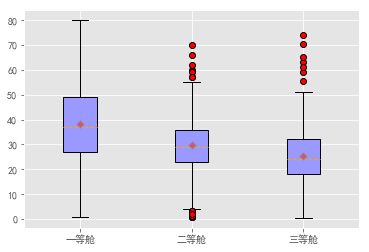

In [2]:
# 按舱级排序，为了后面正常显示分组盒形图的顺序
titanic.sort_values(by = 'Pclass', inplace=True)

# 通过for循环将不同仓位的年龄人群分别存储到列表Age变量中
Age = []
Levels = titanic.Pclass.unique()
for Pclass in Levels:
    Age.append(titanic.loc[titanic.Pclass==Pclass,'Age'])

# 绘图
plt.boxplot(x = Age, 
            patch_artist=True,
            labels = ['一等舱','二等舱','三等舱'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 显示图形
plt.show()

如果对人群的年龄按不同的舱位来看，我们会发现一个明显的趋势，就是舱位等级越高的乘客，他们的年龄越高，三种舱位的平均年龄为38、30和25，说明年龄越是偏大一点，他们的经济能力会越强一些，所买的舱位等级可能就会越高一些。同时，在二等舱和三等舱内，乘客的年龄上存在一些异常用户。